# K-Means Clustering

## Importing the libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [21]:
dataset = pd.read_csv('nn.csv')
X = dataset.iloc[:, [3,4]].values

In [22]:
dataset

,time,types,x,y,z
0,1000,1,0.001630,0.002527,0.050572
1,2000,1,0.001630,0.002527,0.044688
2,2000,1,0.006728,0.006424,0.070307
3,3000,1,0.001630,0.002527,0.034881
4,3000,1,0.006728,0.006424,0.064957
...,...,...,...,...,...
19442,1000000,2,-0.000747,0.000385,-0.017445
19443,1000000,2,0.006913,0.002318,-0.010443
19444,1000000,2,-0.019478,0.000156,-0.004057
19445,1000000,2,-0.057368,0.000774,0.018149


In [23]:
dataset.iloc[:,4].values

array([ 0.0505716 ,  0.044688  ,  0.0703071 , ..., -0.00405728,
        0.0181489 ,  0.089678  ])

In [24]:
X

array([[ 0.00252669,  0.0505716 ],
       [ 0.00252669,  0.044688  ],
       [ 0.00642377,  0.0703071 ],
       ...,
       [ 0.00015588, -0.00405728],
       [ 0.00077445,  0.0181489 ],
       [ 0.00486125,  0.089678  ]])

## Using the elbow method to find the optimal number of clusters

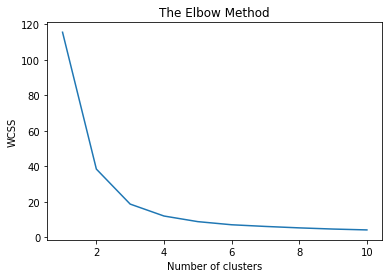

In [25]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## Training the K-Means model on the dataset

In [26]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

## Visualising the clusters

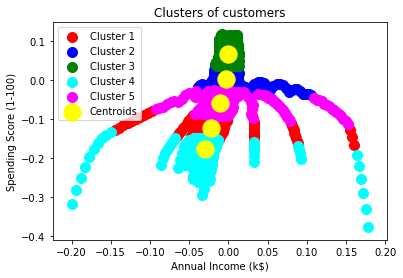

In [30]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 100, c = 'blue', label = 'Cluster 2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 100, c = 'green', label = 'Cluster 3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 100, c = 'cyan', label = 'Cluster 4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 100, c = 'magenta', label = 'Cluster 5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'yellow', label = 'Centroids')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()